In [3]:
import cv2
import numpy as np

SIFT Detector

In [3]:
sift = cv2.SIFT_create()

In [10]:
img_1 = cv2.imread("cat1.jpg")
img_2 = cv2.imread("cat2.jpg")

In [5]:
kp1, des1 = sift.detectAndCompute(img_1, None)
kp2, des2 = sift.detectAndCompute(img_2, None)

Find matches using k nearest neighbors

In [7]:
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

In [8]:
good = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good.append([m])

In [12]:
img3 = cv2.drawMatchesKnn(
    img_1, kp1, img_2, kp2, good, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
)

In [15]:
cv2.imwrite("out.jpg", img3)

True

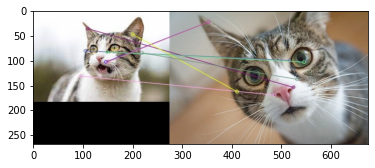

In [4]:
import matplotlib.pyplot as plt

img = cv2.imread("out.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()